<a href="https://colab.research.google.com/github/alexandarM/Machine-Learning/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("loan_data_set.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [ ]:
for feature in df.columns:
  print(f"Feature {feature} has |{df[feature].nunique()}| values :\n{df[feature].unique()}\n\n")

Feature Loan_ID has |614| values :
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP0

In [ ]:
na = df.isna().sum()
nap = round(na/df.shape[0],3) * 100
frames = [na,nap]
na_perc = pd.concat(frames,axis = 1)
na_perc.rename(columns= {0:"NaN",1:"NaN %"})

,NaN,NaN %
Loan_ID,0,0.0
Gender,13,2.1
Married,3,0.5
Dependents,15,2.4
Education,0,0.0
Self_Employed,32,5.2
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,22,3.6
Loan_Amount_Term,14,2.3


In [ ]:
print(f"Number of duplicates in dataset : {df.duplicated().sum()}")

Number of duplicates in dataset : 0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Univariate analysis


In [ ]:
print(df.columns)
df.dtypes

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
#Loan_ID has all unique values
df.drop(columns=["Loan_ID"],inplace=True)

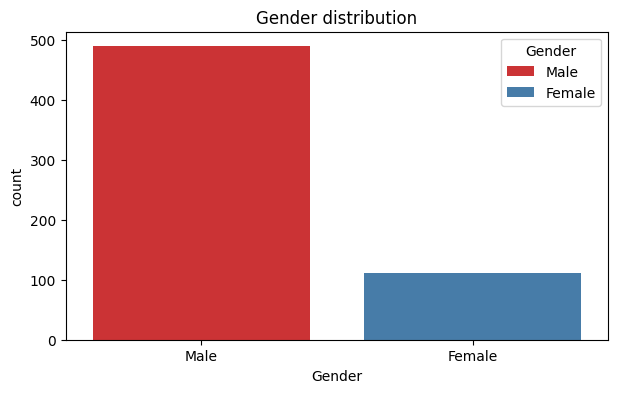

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,x="Gender",palette="Set1",hue="Gender")
plt.title("Gender distribution")
plt.show()

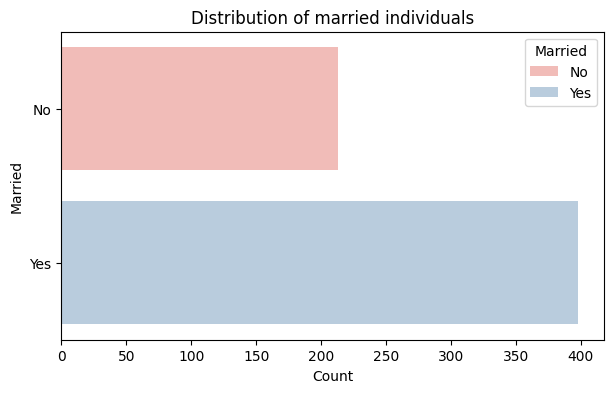

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,y=df["Married"],palette="Pastel1",hue="Married")
plt.title("Distribution of married individuals")
plt.xlabel("Count")
plt.ylabel("Married")
plt.show()

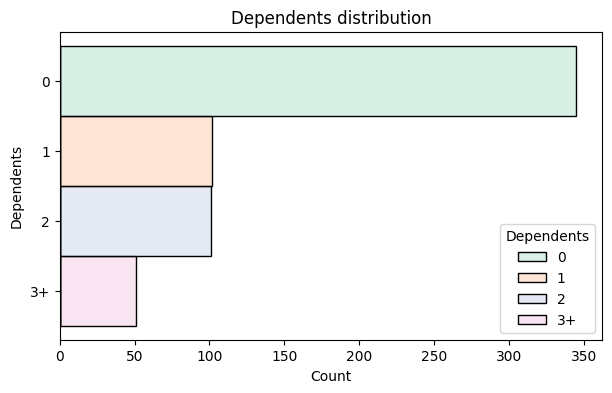

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,y="Dependents",palette="Pastel2",hue="Dependents")
plt.title("Dependents distribution")
plt.xlabel("Count")
plt.ylabel("Dependents")
plt.show()

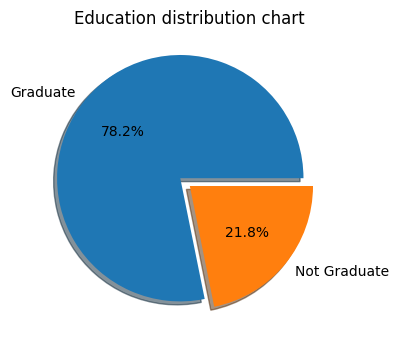

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Education distribution chart")
plt.pie(x=df["Education"].value_counts(),labels = df["Education"].unique(),explode=(0.1,0),shadow = True,autopct="%1.1f%%")
plt.show()

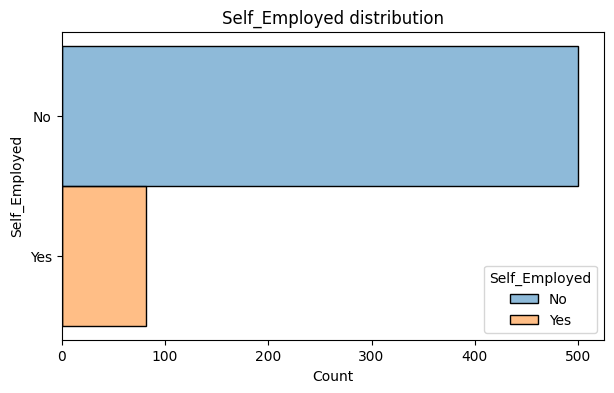

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,y="Self_Employed",palette="tab10",hue="Self_Employed")
plt.title("Self_Employed distribution")
plt.xlabel("Count")
plt.ylabel("Self_Employed")
plt.show()

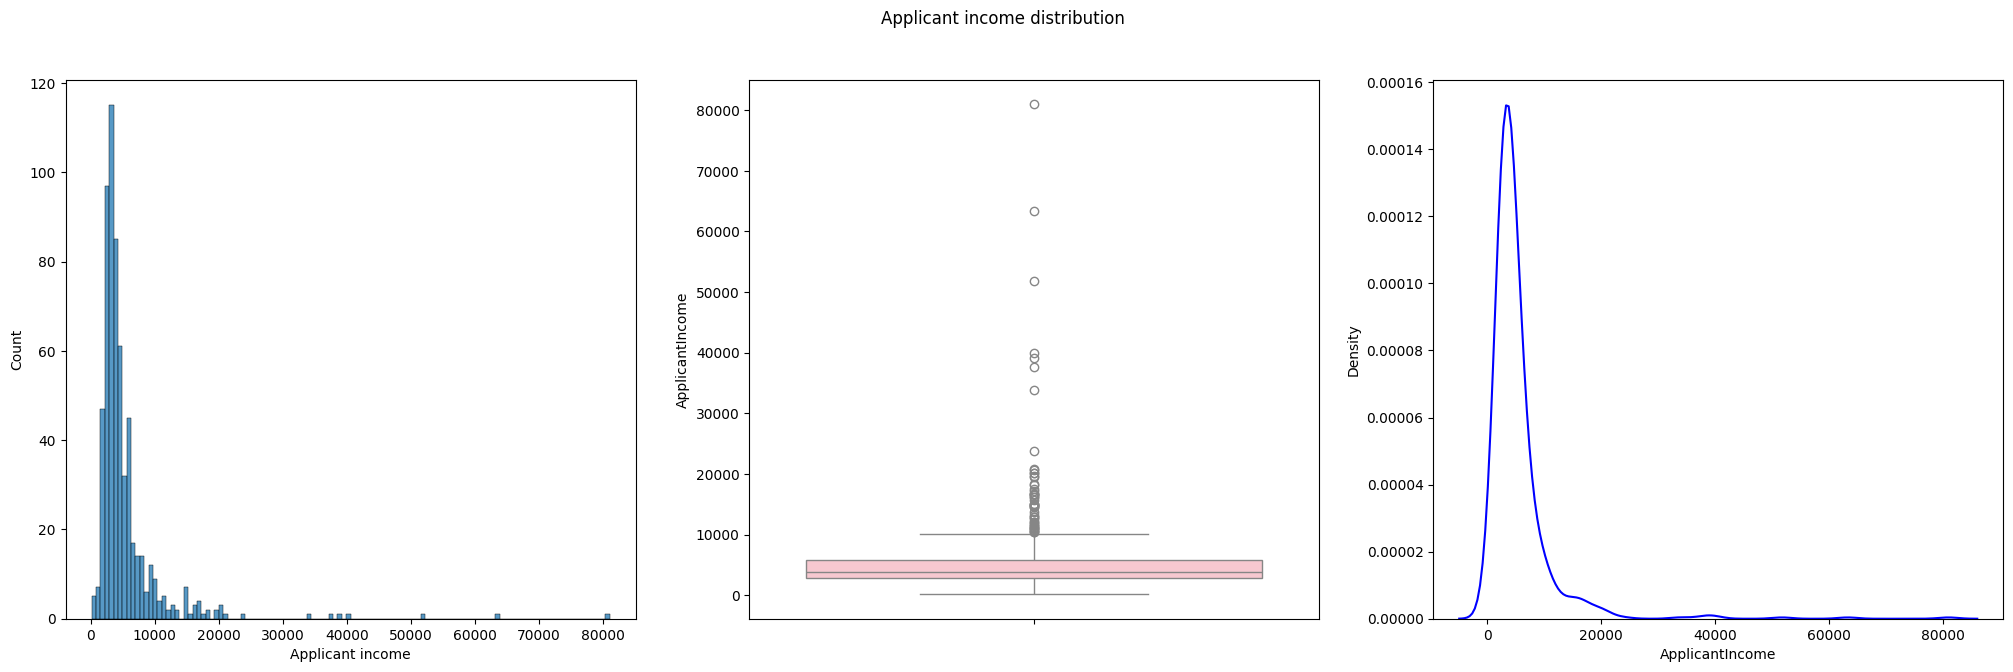

In [ ]:
plt.figure(figsize=(25,7)).suptitle("Applicant income distribution")
plt.subplot(1,3,1)
sns.histplot(data=df,x="ApplicantIncome")
plt.xlabel("Applicant income")
plt.subplot(1,3,2)
sns.boxplot(data=df["ApplicantIncome"],color="pink")
plt.subplot(1,3,3)
sns.kdeplot(data=df["ApplicantIncome"],color="blue")
plt.show()

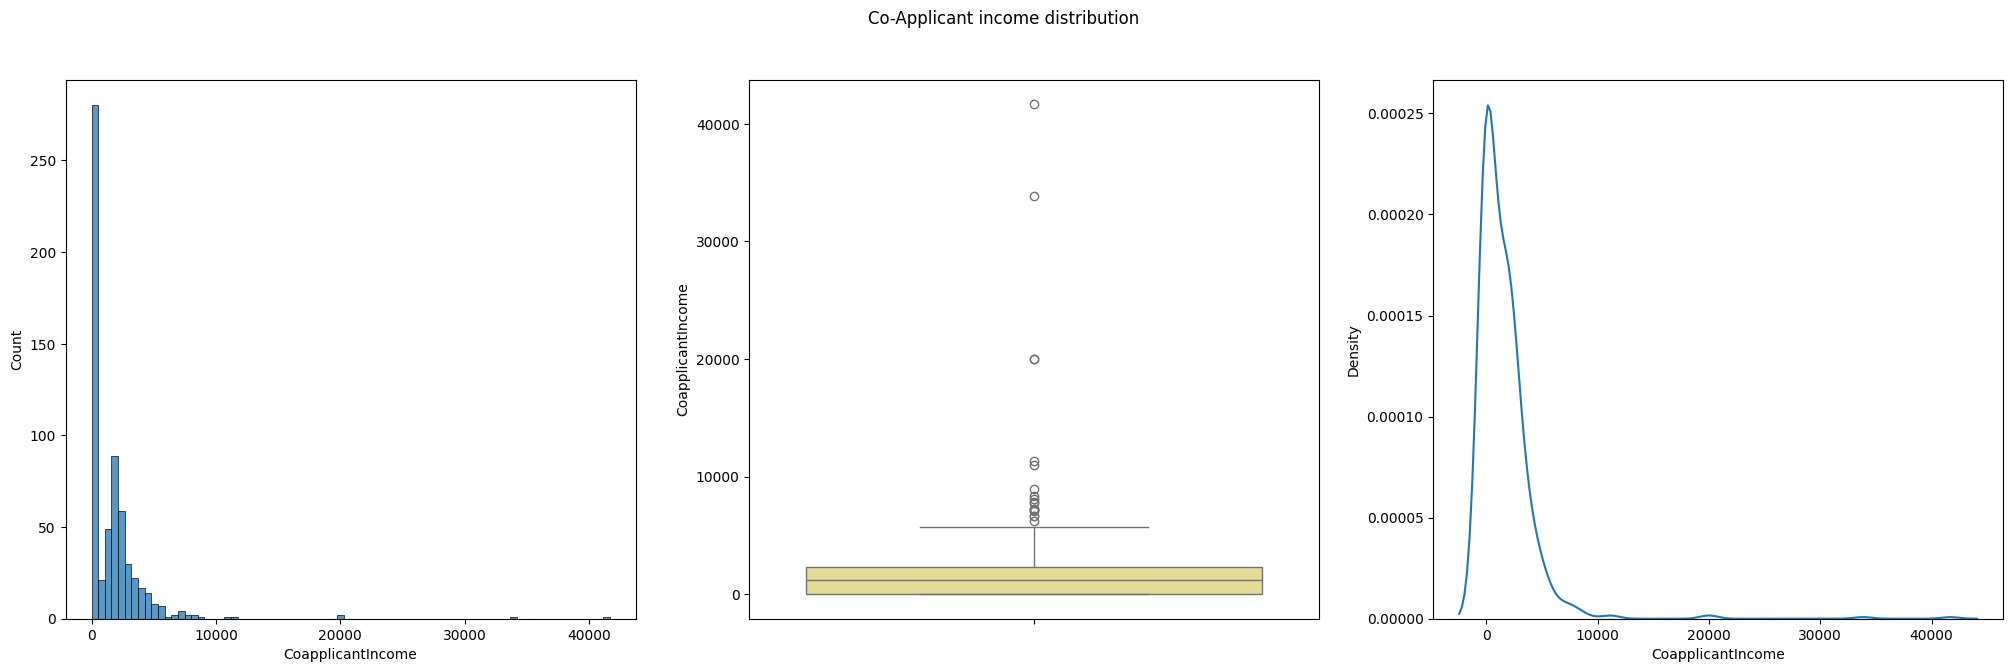

In [ ]:
plt.figure(figsize=(25,7)).suptitle("Co-Applicant income distribution")
plt.subplot(1,3,1)
sns.histplot(data=df,x="CoapplicantIncome")
plt.subplot(1,3,2)
sns.boxplot(data=df["CoapplicantIncome"],color="khaki")
plt.subplot(1,3,3)
sns.kdeplot(data=df["CoapplicantIncome"])
plt.show()

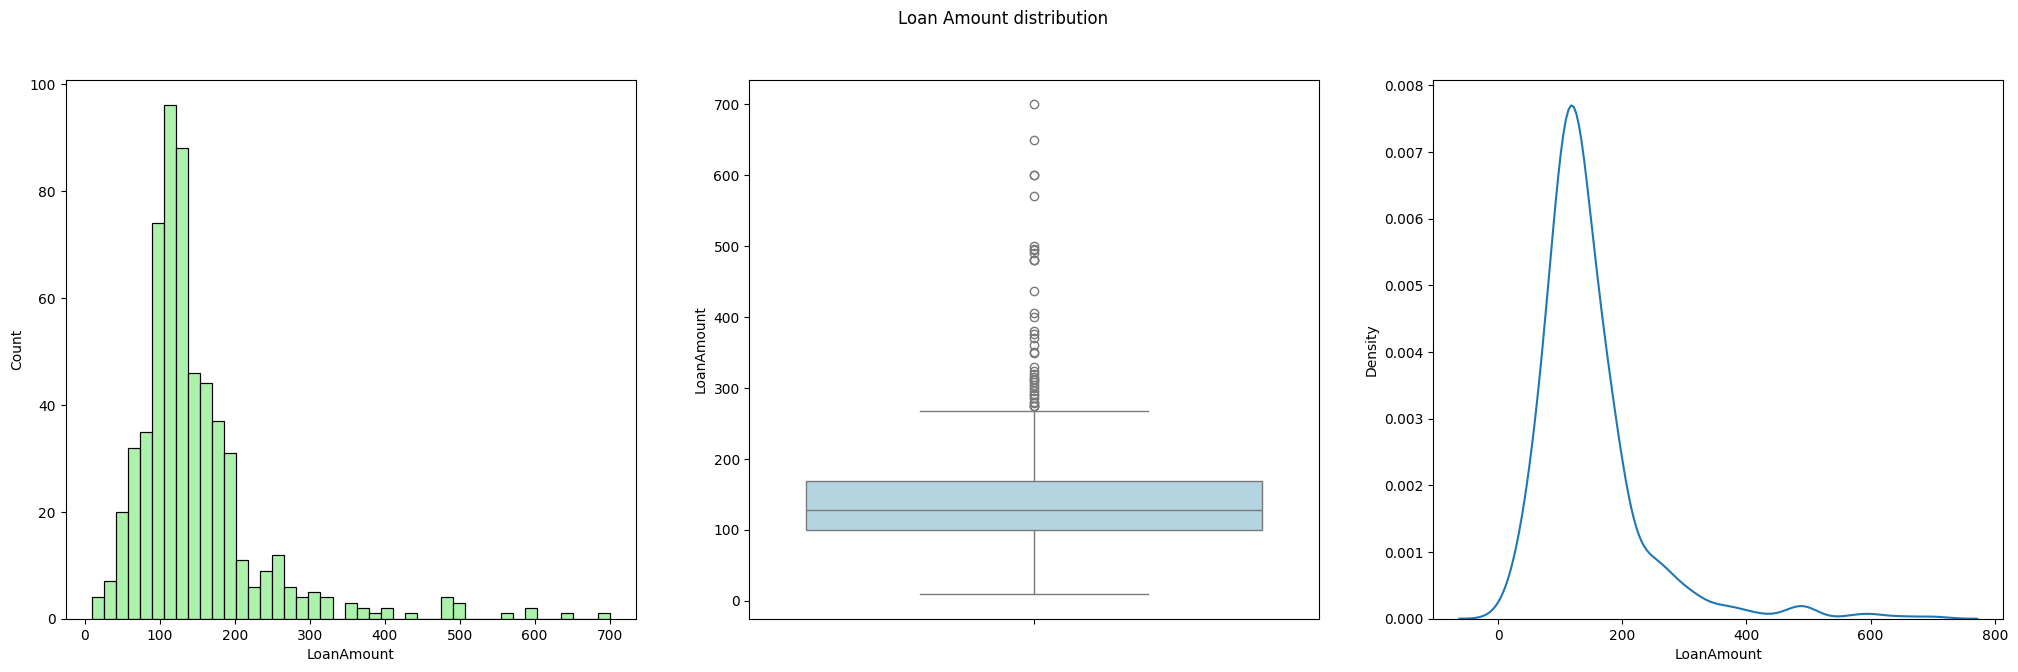

In [ ]:
plt.figure(figsize=(25,7)).suptitle("Loan Amount distribution")
plt.subplot(1,3,1)
sns.histplot(data=df,x="LoanAmount",color="lightgreen")
plt.subplot(1,3,2)
sns.boxplot(data=df["LoanAmount"],color="lightblue")
plt.subplot(1,3,3)
sns.kdeplot(data=df["LoanAmount"])
plt.show()

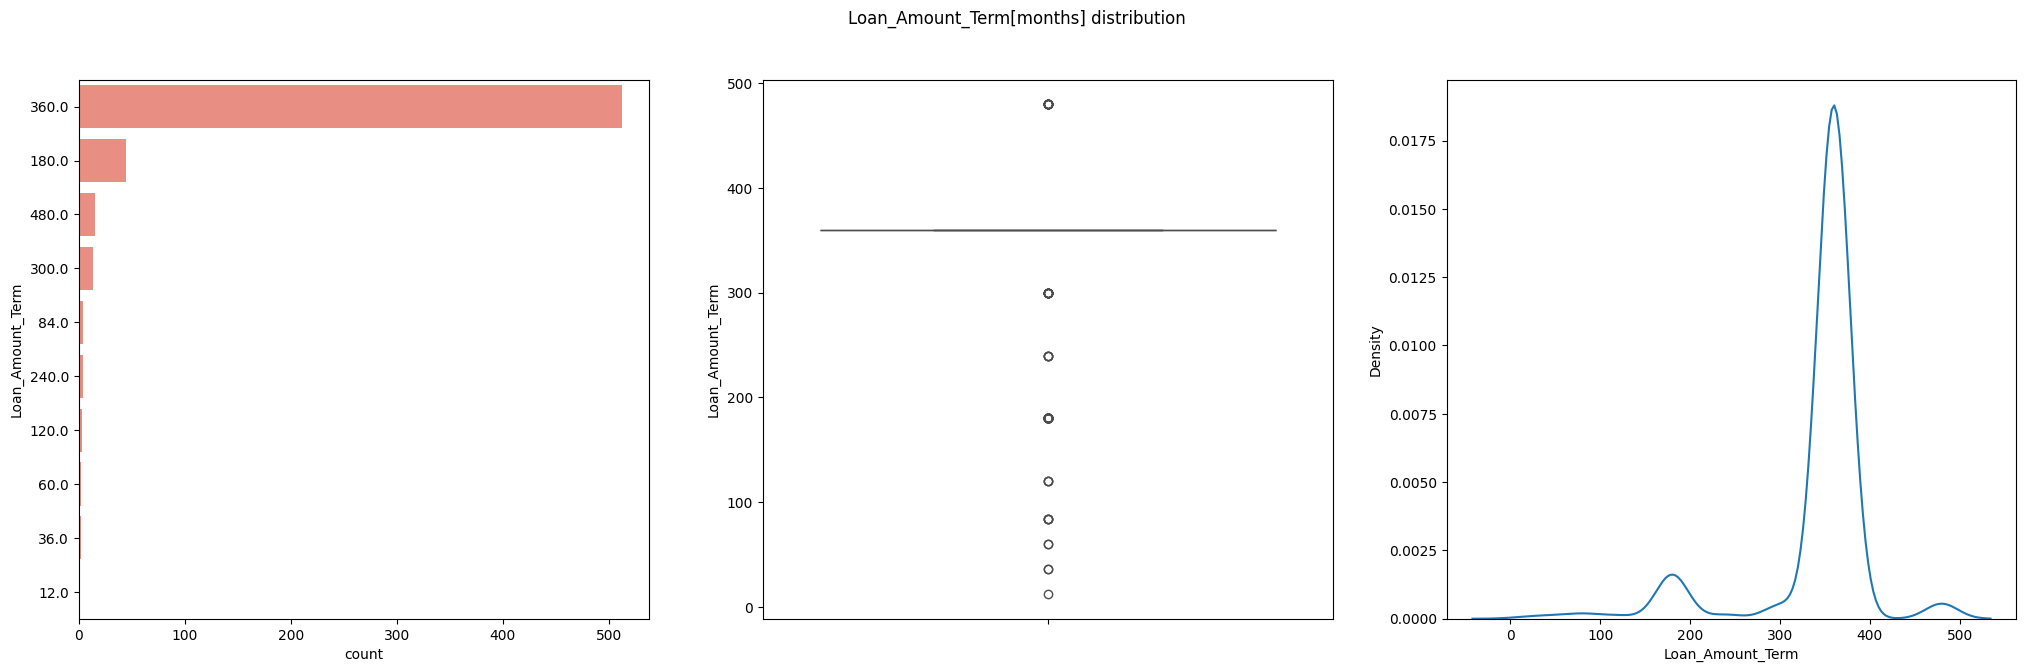

In [ ]:
plt.figure(figsize=(25,7)).suptitle("Loan_Amount_Term[months] distribution")
plt.subplot(1,3,1)
sns.countplot(data=df,y="Loan_Amount_Term",order = df["Loan_Amount_Term"].value_counts().index,color="salmon")
plt.subplot(1,3,2)
sns.boxplot(data=df["Loan_Amount_Term"],color="red")
plt.subplot(1,3,3)
sns.kdeplot(data=df["Loan_Amount_Term"])
plt.show()

<Axes: title={'center': 'Credit History distribution'}, xlabel='count', ylabel='Credit_History'>

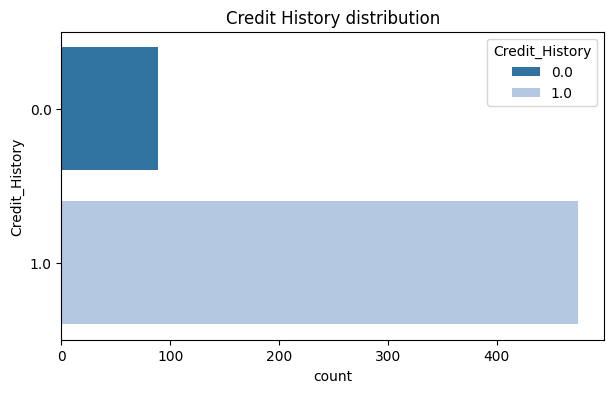

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Credit History distribution")
sns.countplot(data=df,y="Credit_History",hue="Credit_History",palette="tab20")

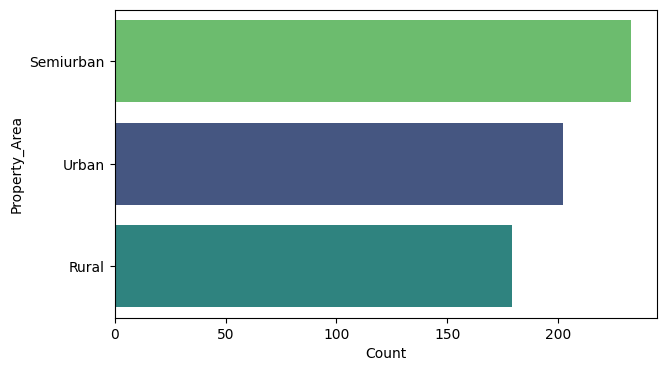

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,y="Property_Area",order = df["Property_Area"].value_counts().index,hue="Property_Area",palette="viridis")
plt.xlabel("Count")
plt.show()

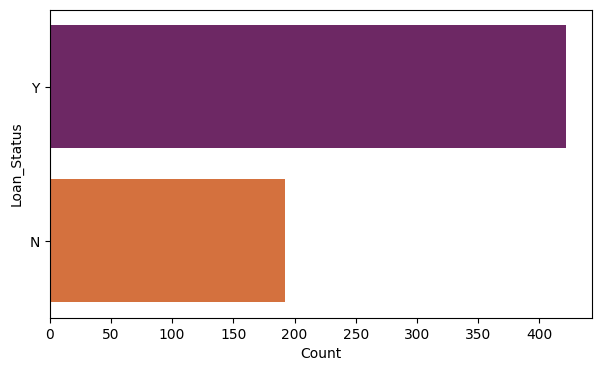

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,y="Loan_Status",order = df["Loan_Status"].value_counts().index,hue="Loan_Status",palette="inferno")
plt.xlabel("Count")
plt.show()

# Bivariate/Multivariate analysis

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
ct = pd.crosstab(df["ApplicantIncome"],df["Gender"])

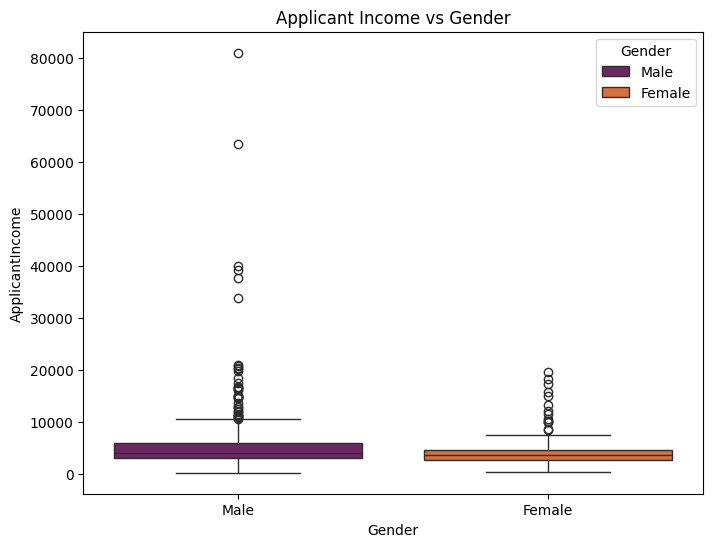

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,y="ApplicantIncome",x="Gender",hue="Gender",palette="inferno")
plt.title("Applicant Income vs Gender")
plt.show()

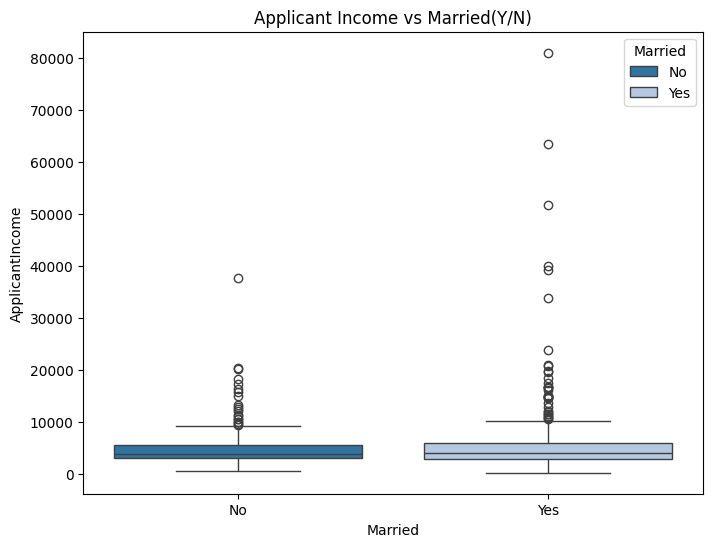

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,y="ApplicantIncome",x="Married",hue="Married",palette="tab20")
plt.title("Applicant Income vs Married(Y/N)")
plt.show()

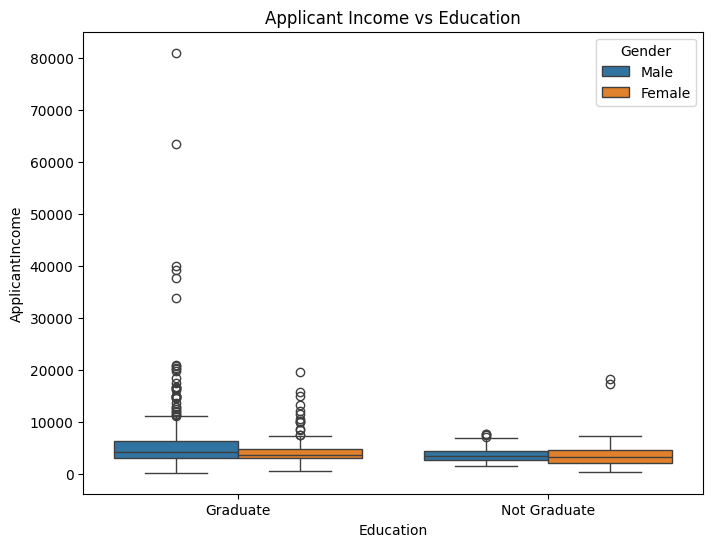

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,y="ApplicantIncome",x="Education",hue="Gender",palette="tab10")
plt.title("Applicant Income vs Education")
plt.show()


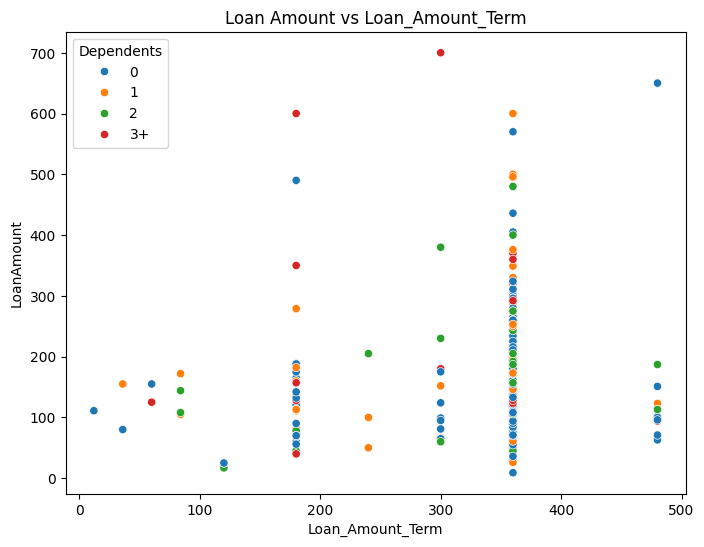

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,y="LoanAmount",x="Loan_Amount_Term",hue="Dependents")
plt.title("Loan Amount vs Loan_Amount_Term")
plt.show()

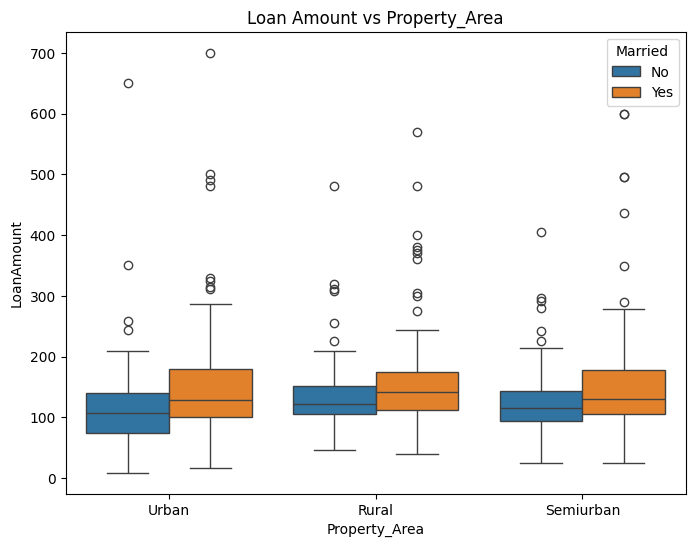

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,y="LoanAmount",x="Property_Area",hue="Married")
plt.title("Loan Amount vs Property_Area")
plt.show()

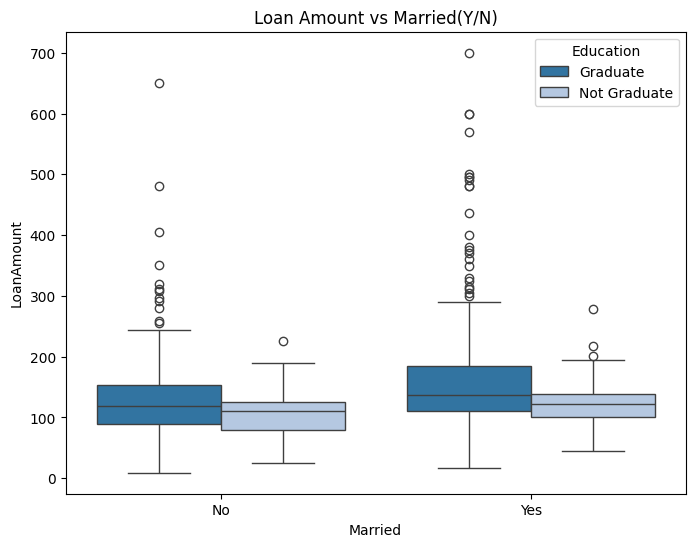

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,y="LoanAmount",x="Married",hue="Education",palette="tab20")
plt.title("Loan Amount vs Married(Y/N)")
plt.show()

Text(0.5, 1.0, 'ApplicantIncome / CoapplicantIncome')

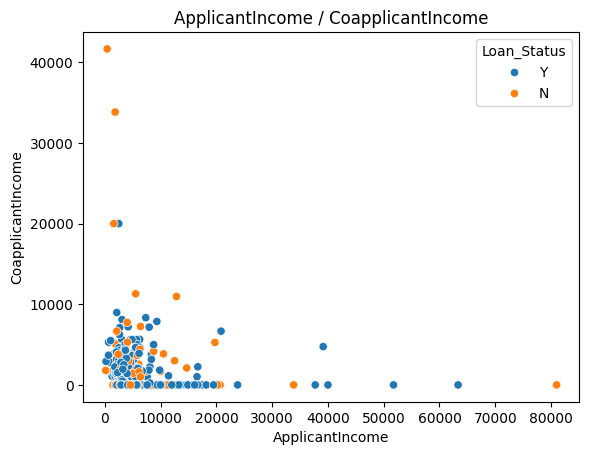

In [ ]:
sns.scatterplot(data=df,x="ApplicantIncome",y="CoapplicantIncome",hue="Loan_Status")
plt.title("ApplicantIncome / CoapplicantIncome")

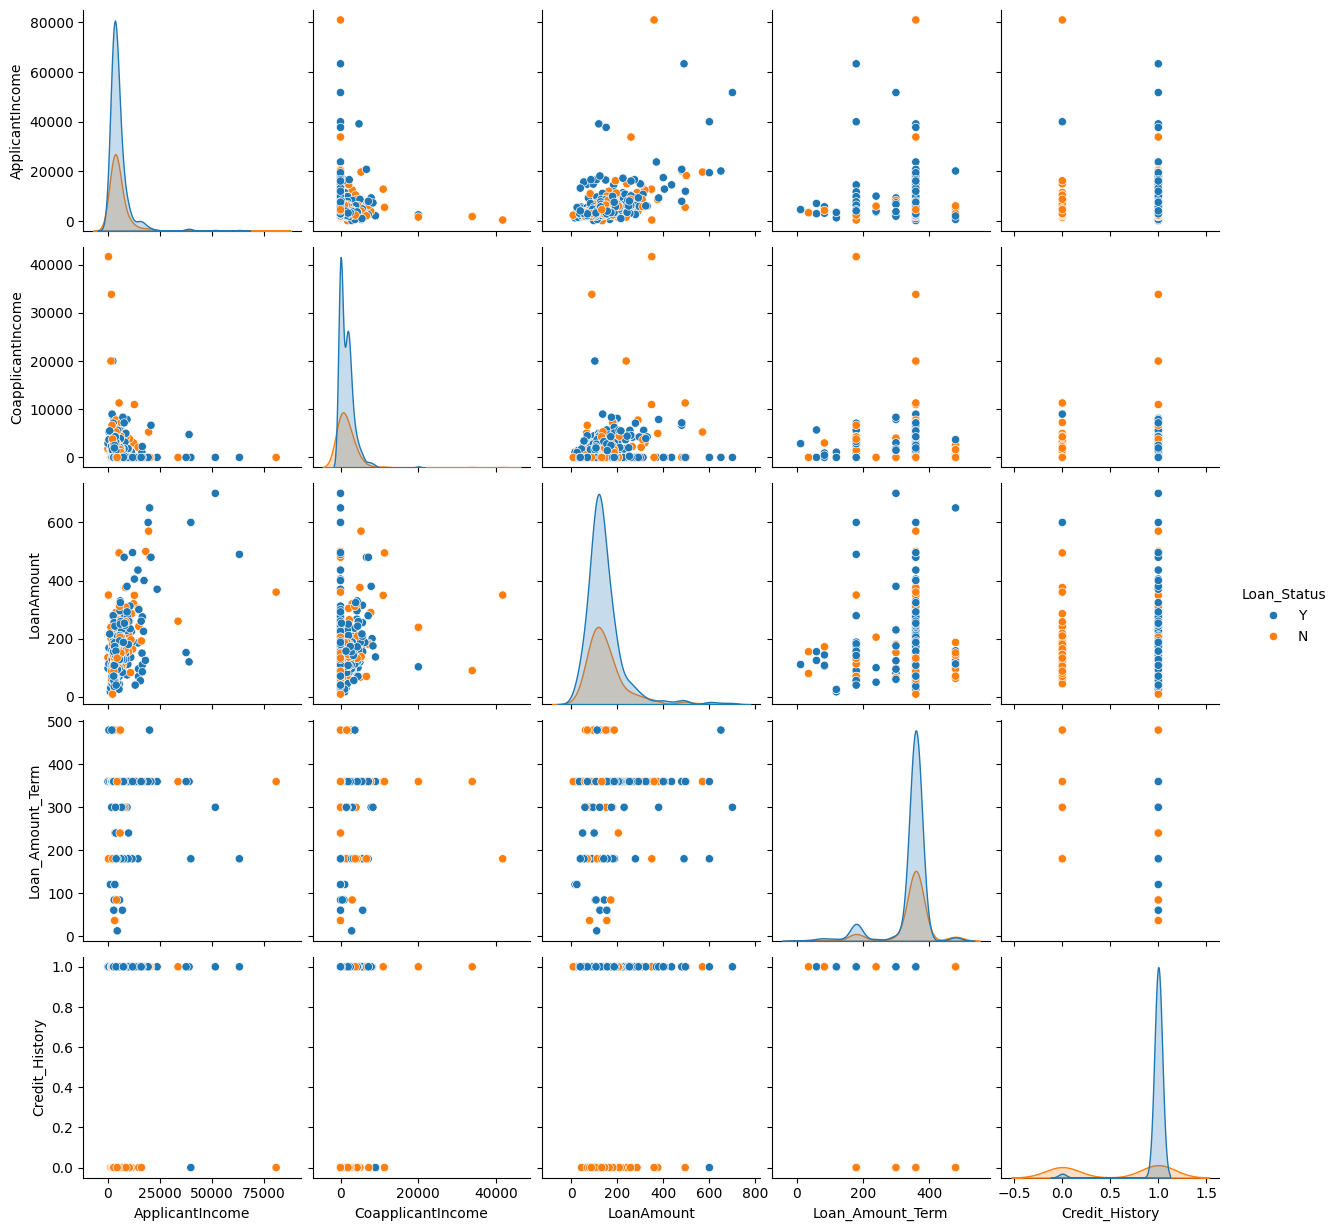

In [ ]:
sns.pairplot(data=df,hue="Loan_Status")

<Axes: >

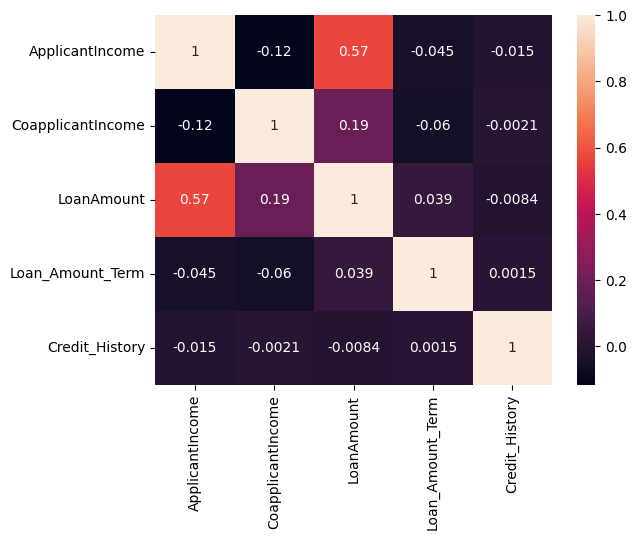

In [ ]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True)

# Model building

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,LearningCurveDisplay,validation_curve,ValidationCurveDisplay
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
import xgboost as xgb

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Seperating TARGET feature from other features
X = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']               # Target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,stratify = y
)

In [ ]:
# Categorical and numerical features
cat_feats = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]
num_feats = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [ ]:
# Data preprocessing (imputing,scaling..)
preprocessor = ColumnTransformer([

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_feats),

    ('num', Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler())
    ]), num_feats),

])

In [ ]:
# Main pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', None) #placeholder for classifiers
])

In [ ]:
# Classifiers parameters
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter': [1000]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5]
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    }
]


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Model: RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=200)
Best Parameters: {'classifier': RandomForestClassifier(), 'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best Validation Score: 0.7949

Classification Report:
              precision    recall  f1-score   support

           N       0.91      0.55      0.69        58
           Y       0.83      0.98      0.90       127

    accuracy                           0.84       185
   macro avg       0.87      0.76      0.79       185
weighted avg       0.85      0.84      0.83       185



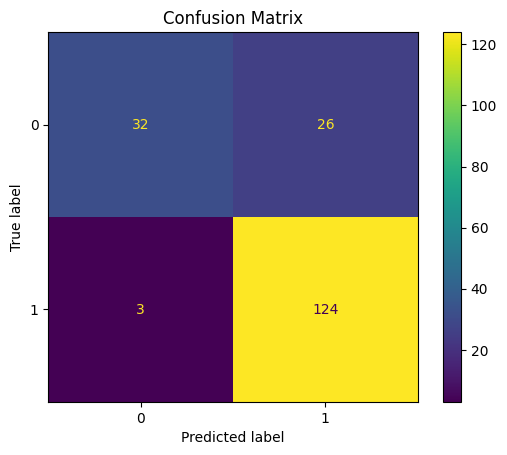

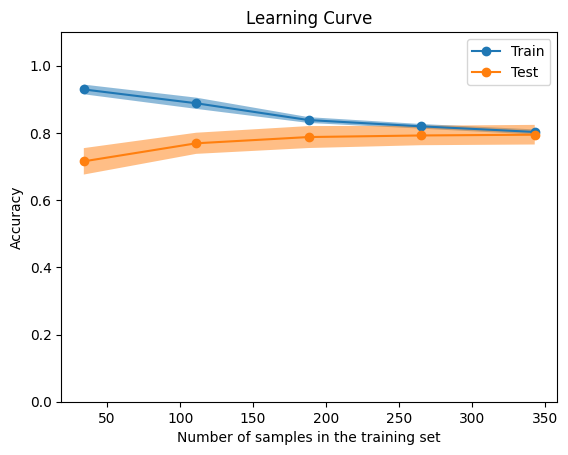

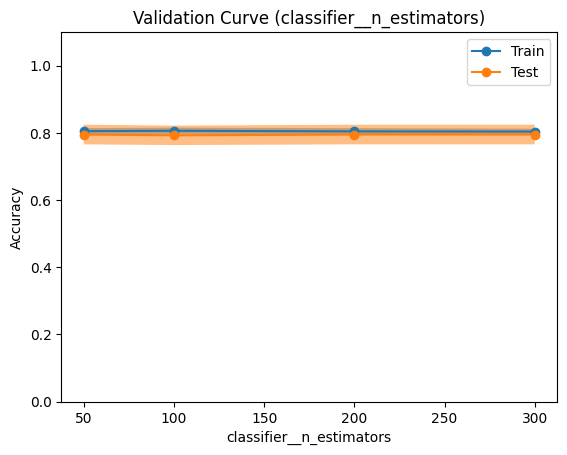

In [ ]:
# Model training and selection
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy',
                          cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model results
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Model: {best_model.named_steps['classifier']}")
print(f"Best Parameters: {best_params}")
print(f"Best Validation Score: {best_score:.4f}")

# Test set evaluation
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Learning Curve
LearningCurveDisplay.from_estimator(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    score_name="Accuracy",
    line_kw={"marker": "o"},
    std_display_style="fill_between",
)
plt.title("Learning Curve")
plt.ylim(0, 1.1)
plt.show()

# Validation Curve graph
clf = best_model.named_steps['classifier']
if isinstance(clf, LogisticRegression):
    param_name = 'classifier__C'
    param_range = np.logspace(-3, 3, 7)
elif isinstance(clf, RandomForestClassifier):
    param_name = 'classifier__n_estimators'
    param_range = [50, 100, 200, 300]
elif isinstance(clf, SVC):
    param_name = 'classifier__C'
    param_range = np.logspace(-3, 3, 7)
else:
    param_name = None

if param_name:
    ValidationCurveDisplay.from_estimator(
        best_model,
        X_train,
        y_train,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        line_kw={"marker": "o"},
        std_display_style="fill_between",
    )
    plt.title(f"Validation Curve ({param_name})")
    plt.ylim(0, 1.1)
    plt.show()